In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin


In [ ]:
data = pd.read_csv('clustering_data.csv')
print(data.head())

<ipython-input-3-a8f4c07f77f8>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('clustering_data.csv')


              CircleName      RegionName       DivisionName  \
0  Andhra Pradesh Circle  Kurnool Region  Hindupur Division   
1  Andhra Pradesh Circle  Kurnool Region  Hindupur Division   
2  Andhra Pradesh Circle  Kurnool Region  Hindupur Division   
3  Andhra Pradesh Circle  Kurnool Region  Hindupur Division   
4  Andhra Pradesh Circle  Kurnool Region  Hindupur Division   

            OfficeName  Pincode OfficeType  Delivery   District  \
0       Peddakotla B.O   515631         BO  Delivery  ANANTAPUR   
1       Pinnadhari B.O   515631         BO  Delivery  ANANTAPUR   
2  Yerraguntapalle B.O   515631         BO  Delivery  ANANTAPUR   
3  Obulareddipalli B.O   515581         BO  Delivery  ANANTAPUR   
4       Odulapalli B.O   515581         BO  Delivery  ANANTAPUR   

        StateName   Latitude  Longitude  
0  ANDHRA PRADESH    14.5689   77.85624  
1  ANDHRA PRADESH    14.5281  77.857014  
2  ANDHRA PRADESH  14.561111   77.85715  
3  ANDHRA PRADESH    14.2488    78.2588  
4  ANDHR

In [ ]:
filtered_data = data[data['StateName'] == 'MAHARASHTRA']
print(filtered_data)

                CircleName         RegionName         DivisionName  \
934     Maharashtra Circle      Nagpur Region   Amaravati Division   
37630   Maharashtra Circle      Nagpur Region  Chandrapur Division   
37631   Maharashtra Circle      Nagpur Region  Chandrapur Division   
37632   Maharashtra Circle      Nagpur Region  Chandrapur Division   
38709   Maharashtra Circle  Aurangabad Region   Osmanabad Division   
...                    ...                ...                  ...   
156817  Maharashtra Circle      Nagpur Region  Chandrapur Division   
156818  Maharashtra Circle      Nagpur Region  Chandrapur Division   
156819  Maharashtra Circle      Nagpur Region  Chandrapur Division   
156820  Maharashtra Circle      Nagpur Region  Chandrapur Division   
156914  Maharashtra Circle  Goa-Panaji Region    Kolhapur Division   

                       OfficeName  Pincode OfficeType      Delivery  \
934                  Bhatkuli S.O   444602         PO  Non Delivery   
37630            

In [ ]:
filtered_data = filtered_data.drop_duplicates()
filtered_data = filtered_data.dropna()
data = filtered_data
print(data)

                CircleName         RegionName         DivisionName  \
934     Maharashtra Circle      Nagpur Region   Amaravati Division   
37630   Maharashtra Circle      Nagpur Region  Chandrapur Division   
37631   Maharashtra Circle      Nagpur Region  Chandrapur Division   
37632   Maharashtra Circle      Nagpur Region  Chandrapur Division   
38709   Maharashtra Circle  Aurangabad Region   Osmanabad Division   
...                    ...                ...                  ...   
156817  Maharashtra Circle      Nagpur Region  Chandrapur Division   
156818  Maharashtra Circle      Nagpur Region  Chandrapur Division   
156819  Maharashtra Circle      Nagpur Region  Chandrapur Division   
156820  Maharashtra Circle      Nagpur Region  Chandrapur Division   
156914  Maharashtra Circle  Goa-Panaji Region    Kolhapur Division   

                       OfficeName  Pincode OfficeType      Delivery  \
934                  Bhatkuli S.O   444602         PO  Non Delivery   
37630            

In [ ]:
data = data.dropna(subset=['Latitude', 'Longitude'])


data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')


data = data.dropna(subset=['Latitude', 'Longitude'])

latitude_min, latitude_max = 15.5833, 22.0333
longitude_min, longitude_max = 72.6000, 80.9000

data = data[(data['Latitude'] >= latitude_min) & (data['Latitude'] <= latitude_max) &
            (data['Longitude'] >= longitude_min) & (data['Longitude'] <= longitude_max)]

In [ ]:
import geopandas as gpd

In [ ]:
maharashtra_map = gpd.read_file('maharashtra.topo.json')

<Figure size 2000x1600 with 0 Axes>

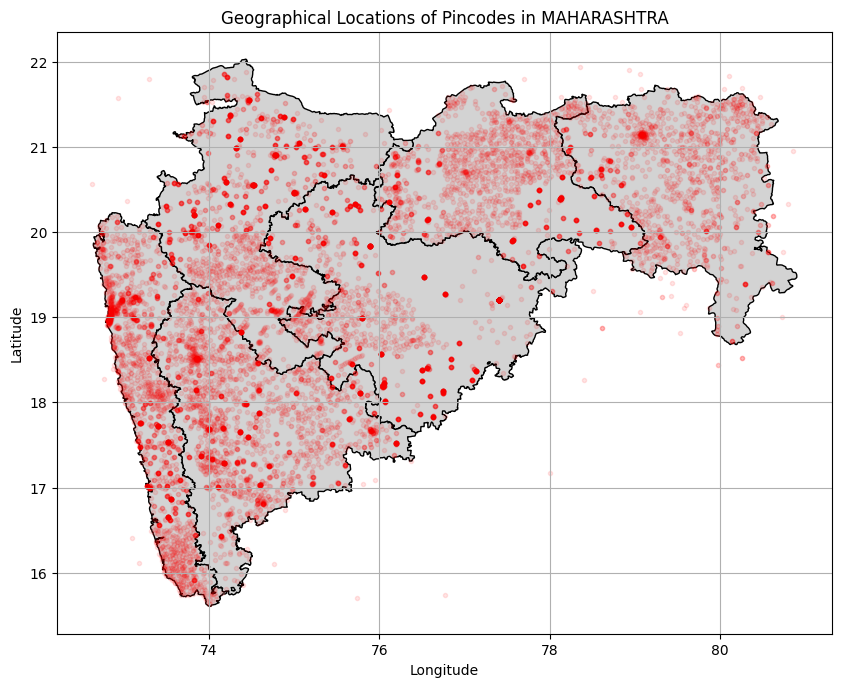

In [ ]:
# scatter plot
plt.figure(figsize=(20, 16))
fig, ax = plt.subplots(figsize=(10, 10))
maharashtra_map.plot(ax=ax, color='lightgrey', edgecolor='black')
plt.scatter(data['Longitude'], data['Latitude'], marker='.', color='red', alpha=0.1)
plt.title('Geographical Locations of Pincodes in {}'.format('MAHARASHTRA'))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [ ]:
def kmeans(X, n_clusters, random_state=0):
    np.random.seed(random_state)


    centroids = X[np.random.choice(range(len(X)), size=n_clusters, replace=False)]

    while True:

        labels = pairwise_distances_argmin(X, centroids)


        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])


        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

X = data[['Longitude', 'Latitude']].values

# I took it directly equalling number of districts in MH
n_clusters = 36

g
centroids, labels = kmeans(X, n_clusters)


data['Cluster'] = labels


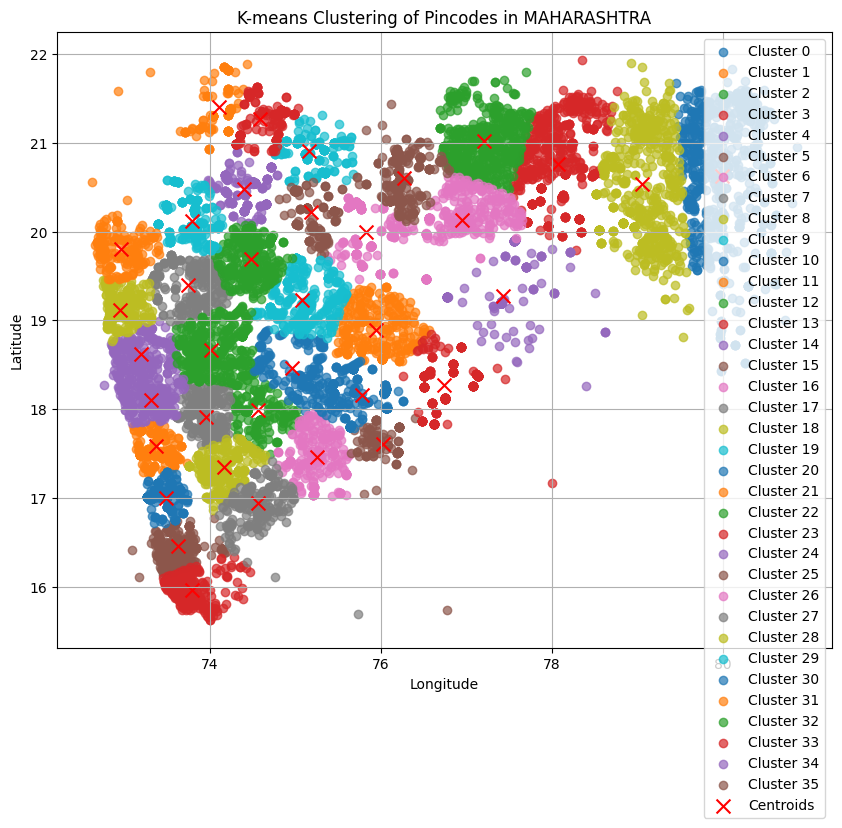

In [ ]:

plt.figure(figsize=(10, 8))


for cluster in range(n_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}', alpha=0.7)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')

plt.title('K-means Clustering of Pincodes in {}'.format('MAHARASHTRA'))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()
